In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("Ice_cream selling data.csv")

In [3]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [4]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [5]:
X.shape

(49,)

In [6]:
X = X.reshape(-1,1)

In [7]:
y.shape

(49,)

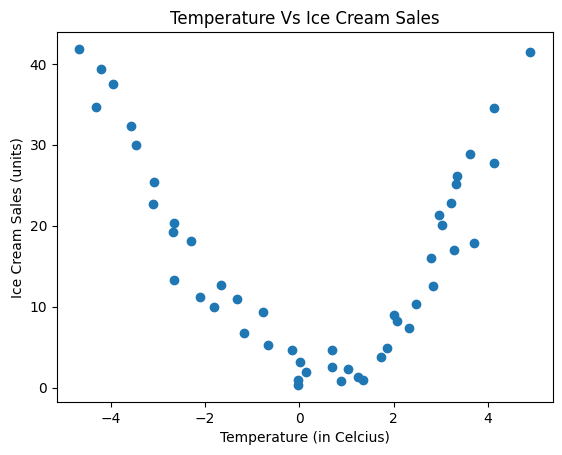

In [8]:
plt.scatter(X, y)
plt.title("Temperature Vs Ice Cream Sales")
plt.xlabel("Temperature (in Celcius)")
plt.ylabel("Ice Cream Sales (units)")
plt.show()

In [9]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [10]:
# Applying Linear Regression
lr = LinearRegression()

In [11]:
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

-0.814820721214357

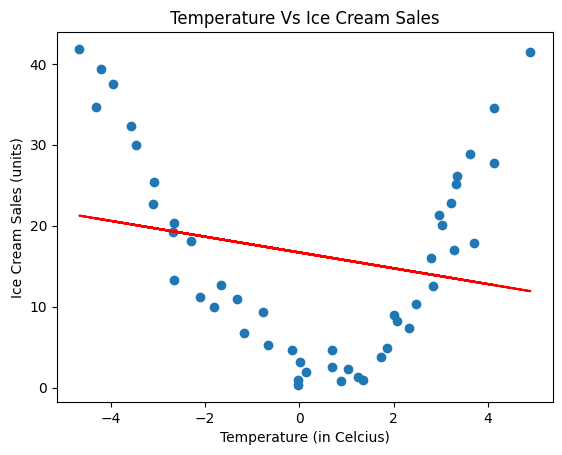

In [13]:
plt.scatter(X, y)
plt.plot(X_train, lr.predict(X_train), color="red")
plt.title("Temperature Vs Ice Cream Sales")
plt.xlabel("Temperature (in Celcius)")
plt.ylabel("Ice Cream Sales (units)")
plt.show()

In [14]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree = 2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [15]:
print(X_train.shape)
print(X_train_trans.shape)

(44, 1)
(44, 3)


In [16]:
print(X_train[0])
print(X_train_trans[0])

[3.61077848]
[ 1.          3.61077848 13.03772121]


In [17]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)

LinearRegression()

In [18]:
y_pred = lr.predict(X_test_trans)

In [19]:
r2_score(y_test, y_pred)

0.8930226720369464

In [20]:
X_new = np.linspace(-5, 5, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

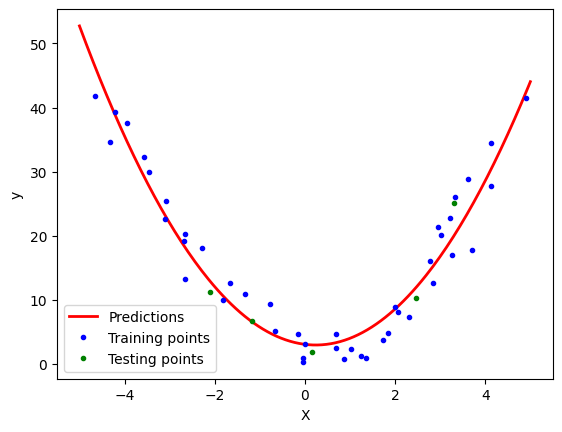

In [21]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.", label="Training points")
plt.plot(X_test, y_test, "g.", label="Testing points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()